In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimal places

In [67]:
df = pd.read_csv('data/Real_Estate_Sales_2001-2022_GL.csv', low_memory=False)

In [68]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.00,248400.00,0.54,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.00,239900.00,0.46,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.00,325000.00,0.46,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.00,202500.00,0.63,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.00,362500.00,0.50,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


In [69]:
df.shape

(1097629, 14)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [71]:
df['Property Type'].value_counts()

Property Type
Single Family     401612
Residential       151064
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         7824
Commercial          5987
Four Family         2150
Apartments          1327
Industrial           795
Public Utility        10
Name: count, dtype: int64

#### Probabilistic Imputation (Based on Category Distribution)

In [72]:
# Probabilistic Imputation (Based on Category Distribution)

# Fill missing values randomly based on existing category distribution
known_values1 = df['Property Type'].dropna()
df.loc[df['Property Type'].isna(), 'Property Type'] = np.random.choice(known_values1, size=df['Property Type'].isna().sum(), replace=True)

# Fill missing values randomly based on existing category distribution
known_values2 = df['Residential Type'].dropna()
df.loc[df['Residential Type'].isna(), 'Residential Type'] = np.random.choice(known_values2, size=df['Residential Type'].isna().sum(), replace=True)


df.head()


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.00,248400.00,0.54,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.00,239900.00,0.46,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.00,325000.00,0.46,Commercial,Condo,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.00,202500.00,0.63,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.00,362500.00,0.50,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     1097629 non-null  object 
 9   Residential Type  1097629 non-null  object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [74]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1097629.00,1097629.00,1097629.00,1097629.00,1097629.00
mean,537035.69,2011.22,281801.58,405314.56,9.60
std,7526073.53,6.77,1657890.08,5143492.36,1801.66
min,0.00,2001.00,0.00,0.00,0.00
25%,30713.00,2005.00,89090.00,145000.00,0.48
50%,80706.00,2011.00,140580.00,233000.00,0.61
75%,170341.00,2018.00,228270.00,375000.00,0.77
max,2000500023.00,2022.00,881510000.00,5000000000.00,1226420.00


In [75]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [76]:
df_new = df[['List Year','Town','Assessed Value','Sale Amount','Sales Ratio','Property Type','Residential Type']]

In [77]:
df_new.head()

,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020,Ansonia,133000.00,248400.00,0.54,Residential,Single Family
1,2020,Ansonia,110500.00,239900.00,0.46,Residential,Three Family
2,2020,Ansonia,150500.00,325000.00,0.46,Commercial,Condo
3,2020,Ansonia,127400.00,202500.00,0.63,Residential,Two Family
4,2021,Avon,179990.00,362500.00,0.50,Residential,Condo


In [78]:
df_new = df_new.dropna()

In [79]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   List Year         1097629 non-null  int64  
 1   Town              1097629 non-null  object 
 2   Assessed Value    1097629 non-null  float64
 3   Sale Amount       1097629 non-null  float64
 4   Sales Ratio       1097629 non-null  float64
 5   Property Type     1097629 non-null  object 
 6   Residential Type  1097629 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 58.6+ MB


In [80]:
# Analyze yearly market trends
df_new.groupby('List Year').mean(['Assessed Value','Sale Amount','Sales Ratio'])

,Assessed Value,Sale Amount,Sales Ratio
List Year,,,
2001,138961.05,246235.04,3.51
2002,177434.08,296357.12,4.09
2003,188067.64,327217.93,5.34
2004,214266.72,380297.01,9.22
2005,198067.15,364030.13,76.01
2006,338248.09,475379.23,52.07
2007,334548.78,435713.38,2.11
2008,292110.83,325831.79,1.60
2009,338422.31,355250.33,2.27


In [81]:
df_new = df_new[~df_new['List Year'].isin([2005, 2006])]

In [82]:
df_new.groupby('List Year').mean(['Assessed Value','Sale Amount','Sales Ratio'])

,Assessed Value,Sale Amount,Sales Ratio
List Year,,,
2001,138961.05,246235.04,3.51
2002,177434.08,296357.12,4.09
2003,188067.64,327217.93,5.34
2004,214266.72,380297.01,9.22
2007,334548.78,435713.38,2.11
2008,292110.83,325831.79,1.60
2009,338422.31,355250.33,2.27
2010,307099.15,331657.47,2.44
2011,412067.64,391684.32,2.74


In [83]:
import seaborn as sns 

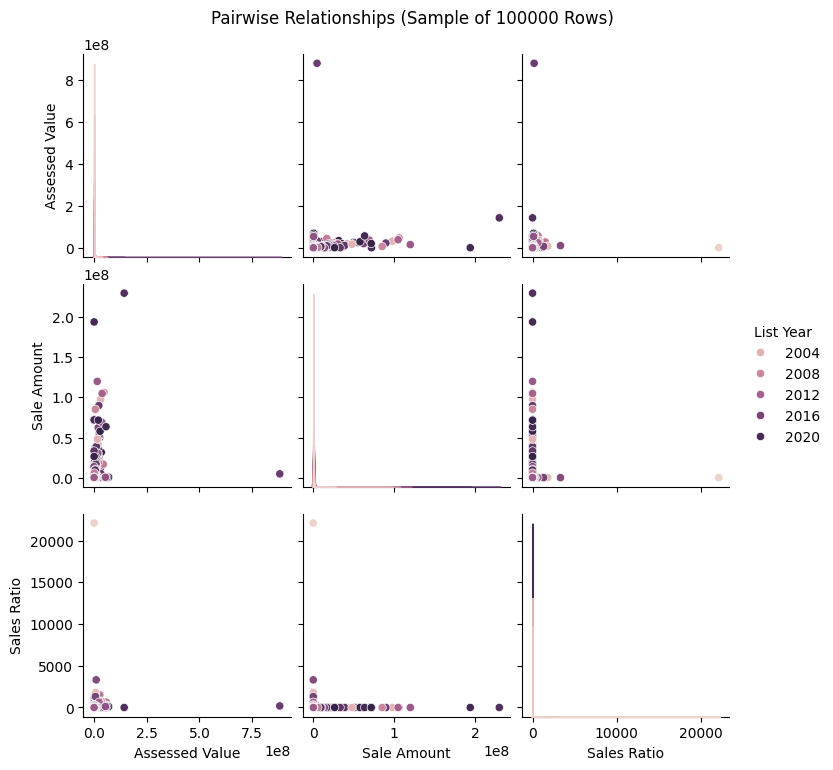

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick only numeric columns for pairplot
cols = ['Assessed Value', 'Sale Amount', 'Sales Ratio', 'List Year']

# Sample for performance
df_sample = df_new[cols].dropna().sample(100000, random_state=42)

# Pairplot
sns.pairplot(df_sample, hue='List Year', diag_kind='kde')
plt.suptitle("Pairwise Relationships (Sample of 100000 Rows)", y=1.02)
plt.show()

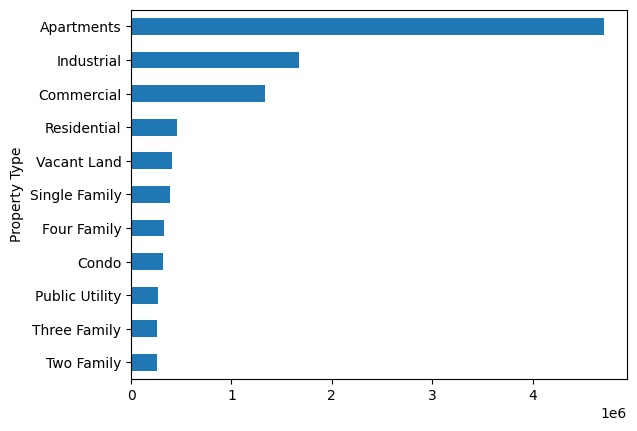

In [86]:
df_new.groupby('Property Type')['Sale Amount'].mean().sort_values().plot(kind='barh')
plt.show()

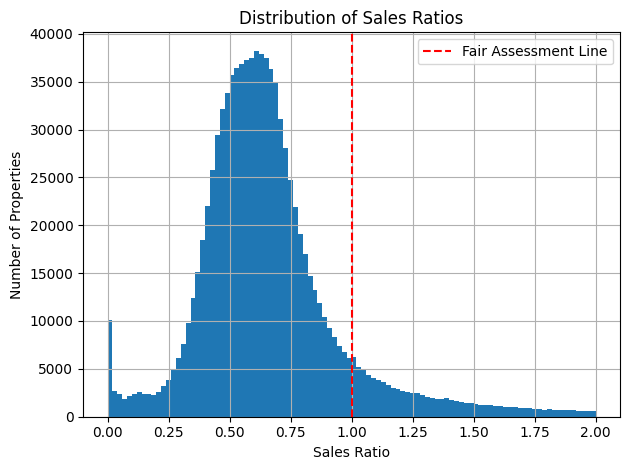

In [87]:
df_new['Sales Ratio'].hist(bins=100, range=(0, 2))
plt.axvline(x=1, color='red', linestyle='--', label='Fair Assessment Line')
plt.title('Distribution of Sales Ratios')
plt.xlabel('Sales Ratio')
plt.ylabel('Number of Properties')
plt.legend()
plt.tight_layout()
plt.show()

In [88]:
## Getting All Different Types OF Features
num_features = [feature for feature in df_new.columns if df_new[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df_new.columns if df_new[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df_new[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 4
Num of Categorical Features : 3
Num of Discrete Features : 1
Num of Continuous Features : 3


In [89]:
df_new.head()

,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020,Ansonia,133000.00,248400.00,0.54,Residential,Single Family
1,2020,Ansonia,110500.00,239900.00,0.46,Residential,Three Family
2,2020,Ansonia,150500.00,325000.00,0.46,Commercial,Condo
3,2020,Ansonia,127400.00,202500.00,0.63,Residential,Two Family
4,2021,Avon,179990.00,362500.00,0.50,Residential,Condo


In [90]:
df_new['Property Type'].value_counts(), df_new['Residential Type'].value_counts()

(Property Type
 Single Family     548169
 Residential       217731
 Condo             142054
 Two Family         36093
 Three Family       17103
 Vacant Land        11260
 Commercial          8664
 Four Family         3022
 Apartments          1946
 Industrial          1184
 Public Utility        16
 Name: count, dtype: int64,
 Residential Type
 Single Family    718191
 Condo            191811
 Two Family        49348
 Three Family      23514
 Four Family        4378
 Name: count, dtype: int64)

In [91]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [92]:
X = df_new.drop('Sale Amount',axis=1) 
y = df_new['Sale Amount']

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [94]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = ['Property Type','Residential Type']
town_features = ['Town']

In [95]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_features),
        ('onehot', OneHotEncoder(handle_unknown= 'ignore'), cat_features),
        ('town', OneHotEncoder(handle_unknown='ignore'), town_features)
        
        
    ],
    remainder='passthrough'
)

In [96]:
#  Transforming training data
X_train_transformed = preprocessor.fit_transform(X_train)
# Transform test data
X_test_transformed = preprocessor.transform(X_test)

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [98]:
from sklearn.svm import SVR
from sklearn.ensemble import  AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [102]:
catboost = CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=5, random_state=42, verbose=0)
catboost.fit(X_train_transformed, y_train)

In [103]:
y_pred_cb = catboost.predict(X_test_transformed)
eval_cb = evaluate_model(y_test, y_pred_cb)
print(f"CatBoost - MAE: {eval_cb[0]:.2f}, RMSE: {eval_cb[1]:.2f}, R2: {eval_cb[2]:.2f}")

CatBoost - MAE: 105638.23, RMSE: 1177669.93, R2: 0.65


In [99]:
XGBreg = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
XGBreg.fit(X_train_transformed, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [100]:
y_pred_xgb = XGBreg.predict(X_test_transformed)

In [101]:
eval_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - MAE: {eval_xgb[0]:.2f}, RMSE: {eval_xgb[1]:.2f}, R2: {eval_xgb[2]:.2f}")

XGBoost - MAE: 45849.57, RMSE: 1013855.01, R2: 0.74


In [ ]:
# Save the model
import joblib
joblib.dump(XGBreg, 'model.pkl')
# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')
# Load the model and preprocessor
loaded_model = joblib.load('model.pkl')
loaded_preprocessor = joblib.load('preprocessor.pkl')
# Example prediction
example_data = pd.DataFrame({
    'List Year': [2022],
    'Town': ['Greenwich'],
    'Assessed Value': [1000000],
    'Sales Ratio': [1.0],
    'Property Type': ['Single Family'],
    'Residential Type': ['Residential']
})
example_data_transformed = loaded_preprocessor.transform(example_data)
predicted_value = loaded_model.predict(example_data_transformed)
print(f"Predicted Sale Amount: {predicted_value[0]:.2f}")


Predicted Sale Amount: 1095895.38
